# Load Images Data

In [9]:
# 
%pwd

'C:\\Users\\Huong Doan\\Desktop\\Courses\\Academic courses\\2021_Spring\\CSC_676_Computer_Vision\\Final Project'

In [50]:
!pip install scikit-image

  Attempting uninstall: decorator
    Found existing installation: decorator 5.0.7
    Uninstalling decorator-5.0.7:
      Successfully uninstalled decorator-5.0.7


In [73]:
import sys, os
import glob
import matplotlib.pyplot as plt
import imageio

#from skimage.measure import compare_ssim
#from skimage import measure
import pandas as pd
from skimage.metrics import structural_similarity

In [23]:

# Ref: https://www.geeksforgeeks.org/python-os-chdir-method/
# Ref: https://stackoverflow.com/questions/9234560/find-all-csv-files-in-a-directory-using-python/12280052 


def get_list_filenames(cwd, path, extension):
    try:
        os.chdir(path)
        print("Successfully change the directory!")
        filenames = glob.glob('*.{}'.format(extension))
        print("Number of files: ", len(filenames))

    # Caching the exception
    except: 
        print("Something wrong with specified directory. Exception- ", sys.exc_info()) 

    # handling with finally: restore the path which is the current directory before changing directory           
    finally: 
        print("Restoring the path") 
        os.chdir(cwd) # Change it back to cwd (original directory)
        print("Current directory is-", os.getcwd()) 
        
    return filenames


# Ref: https://realpython.com/python-keras-text-classification/

# Get a list of dataframe after reading all csv files given a path
def get_all_image_files_read(path, filenames):
    list_img = []
    for file in filenames:
        img = imageio.imread(path+file)
        list_img.append(img)
    return list_img

In [54]:
# initial directory 
cwd = os.getcwd()
path_org = './Output_data/testing-thumbnails/' # the directory where all the output result are located.
extension = 'png'

list_filenames = get_list_filenames(cwd, path_org, extension)
print(len(list_filenames))

Successfully change the directory!
Number of files:  1352
Restoring the path
Current directory is- C:\Users\Huong Doan\Desktop\Courses\Academic courses\2021_Spring\CSC_676_Computer_Vision\Final Project
1352


In [30]:
# Splits the filenames of all output results into three categories: "mask", "out" and "groudtruth"

list_mask = []
list_out = []
list_groundtruth = []

for fn in list_filenames:
    if "mask" in fn:
        list_mask.append(fn)
    elif "out" in fn:
        list_out.append(fn)
    else:
        list_groundtruth.append(fn)

print(len(list_mask))
print(len(list_groundtruth))
print(len(list_out))

26
26
1300


In [35]:
print(list_out)

['00975_out_0.png', '00975_out_1.png', '00975_out_10.png', '00975_out_11.png', '00975_out_12.png', '00975_out_13.png', '00975_out_14.png', '00975_out_15.png', '00975_out_16.png', '00975_out_17.png', '00975_out_18.png', '00975_out_19.png', '00975_out_2.png', '00975_out_20.png', '00975_out_21.png', '00975_out_22.png', '00975_out_23.png', '00975_out_24.png', '00975_out_25.png', '00975_out_26.png', '00975_out_27.png', '00975_out_28.png', '00975_out_29.png', '00975_out_3.png', '00975_out_30.png', '00975_out_31.png', '00975_out_32.png', '00975_out_33.png', '00975_out_34.png', '00975_out_35.png', '00975_out_36.png', '00975_out_37.png', '00975_out_38.png', '00975_out_39.png', '00975_out_4.png', '00975_out_40.png', '00975_out_41.png', '00975_out_42.png', '00975_out_43.png', '00975_out_44.png', '00975_out_45.png', '00975_out_46.png', '00975_out_47.png', '00975_out_48.png', '00975_out_49.png', '00975_out_5.png', '00975_out_6.png', '00975_out_7.png', '00975_out_8.png', '00975_out_9.png', '00976_ou

In [47]:
# Sort the list_out
# and then create a list of list of out files whose the sub-list is contain the 50 out files 
#         taken from same kind of input image
list_out_sorted = sorted(list_out)
list_list_out_sorted = [[list_out[i + count*50] for i in range(50)] for count in range(26)]
print(list_list_out_sorted)

[['00975_out_0.png', '00975_out_1.png', '00975_out_10.png', '00975_out_11.png', '00975_out_12.png', '00975_out_13.png', '00975_out_14.png', '00975_out_15.png', '00975_out_16.png', '00975_out_17.png', '00975_out_18.png', '00975_out_19.png', '00975_out_2.png', '00975_out_20.png', '00975_out_21.png', '00975_out_22.png', '00975_out_23.png', '00975_out_24.png', '00975_out_25.png', '00975_out_26.png', '00975_out_27.png', '00975_out_28.png', '00975_out_29.png', '00975_out_3.png', '00975_out_30.png', '00975_out_31.png', '00975_out_32.png', '00975_out_33.png', '00975_out_34.png', '00975_out_35.png', '00975_out_36.png', '00975_out_37.png', '00975_out_38.png', '00975_out_39.png', '00975_out_4.png', '00975_out_40.png', '00975_out_41.png', '00975_out_42.png', '00975_out_43.png', '00975_out_44.png', '00975_out_45.png', '00975_out_46.png', '00975_out_47.png', '00975_out_48.png', '00975_out_49.png', '00975_out_5.png', '00975_out_6.png', '00975_out_7.png', '00975_out_8.png', '00975_out_9.png'], ['00976

In [32]:
print(list_mask)

['00975_mask.png', '00976_mask.png', '00977_mask.png', '00978_mask.png', '00979_mask.png', '00980_mask.png', '00981_mask.png', '00982_mask.png', '00983_mask.png', '00984_mask.png', '00985_mask.png', '00986_mask.png', '00987_mask.png', '00988_mask.png', '00989_mask.png', '00990_mask.png', '00991_mask.png', '00992_mask.png', '00993_mask.png', '00994_mask.png', '00995_mask.png', '00996_mask.png', '00997_mask.png', '00998_mask.png', '00999_mask.png', 'Yunting_mask.png']


In [33]:
print(list_groundtruth)

['00975_truth.png', '00976_truth.png', '00977_truth.png', '00978_truth.png', '00979_truth.png', '00980_truth.png', '00981_truth.png', '00982_truth.png', '00983_truth.png', '00984_truth.png', '00985_truth.png', '00986_truth.png', '00987_truth.png', '00988_truth.png', '00989_truth.png', '00990_truth.png', '00991_truth.png', '00992_truth.png', '00993_truth.png', '00994_truth.png', '00995_truth.png', '00996_truth.png', '00997_truth.png', '00998_truth.png', '00999_truth.png', 'Yunting_truth.png']


In [39]:
# Get all different kinds of images from output results
list_img_kind = [fn.split("_")[0] for fn in list_mask]
        
print(len(list_img_kind))
print(list_img_kind)

26
['00975', '00976', '00977', '00978', '00979', '00980', '00981', '00982', '00983', '00984', '00985', '00986', '00987', '00988', '00989', '00990', '00991', '00992', '00993', '00994', '00995', '00996', '00997', '00998', '00999', 'Yunting']


## Read all images

In [56]:
# read images given a list of filename
list_img_mask = get_all_image_files_read(path_org, list_mask)
list_img_groundtruth = get_all_image_files_read(path_org, list_groundtruth)
list_list_img_out = [get_all_image_files_read(path_org, list_fn) for list_fn in list_list_out_sorted]

print(len(list_img_mask))
print(len(list_img_groundtruth))
print(len(list_list_img_out))

26
26
26


## Visualize images

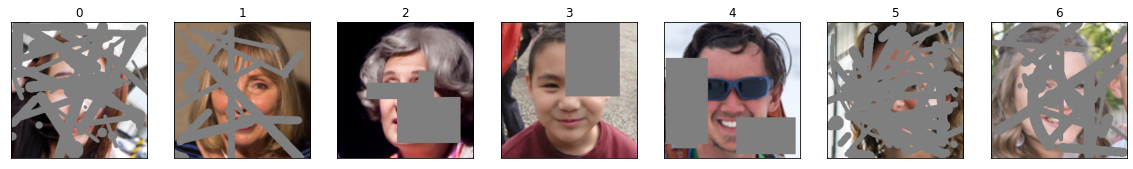

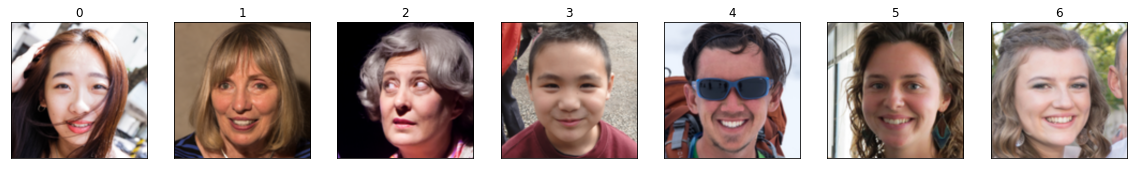

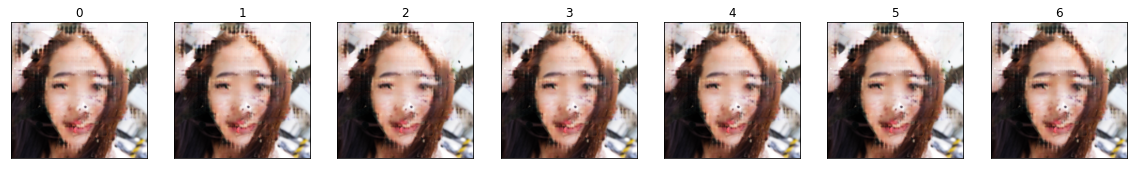

In [297]:
# Visualization of some images in the list
def plot_multiple_given_img_id(list_image_id, list_img, n):
    plt.figure(figsize=(20,20))
    i=1
    for img_id in list_image_id:
        if (img_id < len(list_img)) and i < n+1:
            plt.subplot(1,n,i)
            plt.title(str(img_id))
            plt.imshow(list_img[img_id])
            plt.xticks([]), plt.yticks([])
            i = i + 1
    plt.show()
    
# Visualization of some images in the list
plot_multiple_given_img_id([i for i in range(7)], list_img_mask, 7)
plot_multiple_given_img_id([i for i in range(7)], list_img_groundtruth, 7)
plot_multiple_given_img_id([i for i in range(7)], list_list_img_out[0], 7)

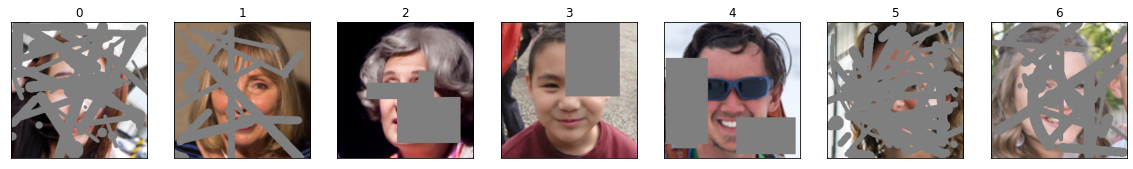

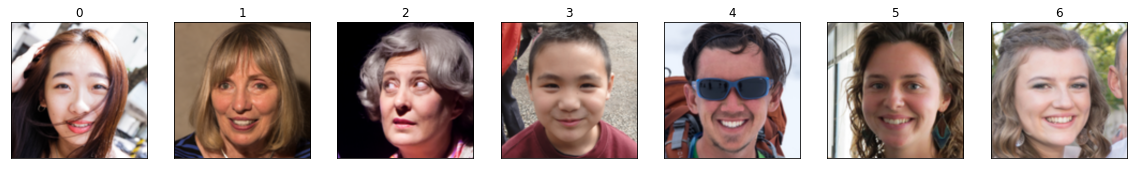

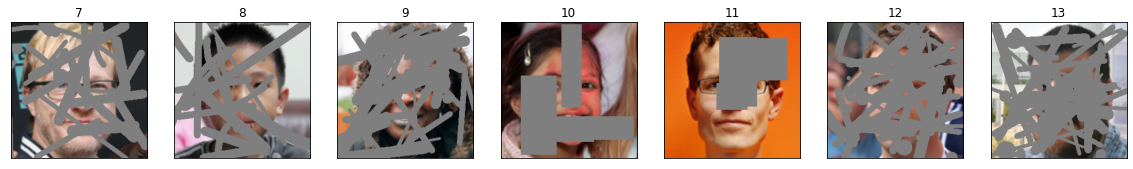

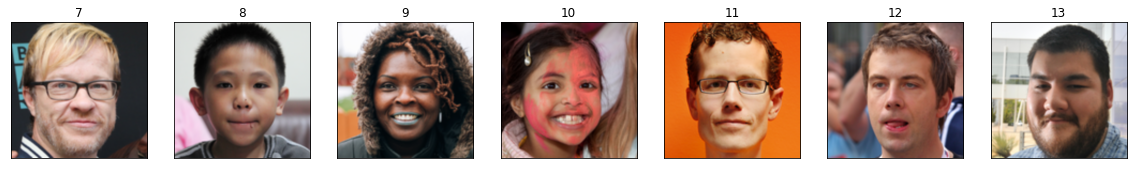

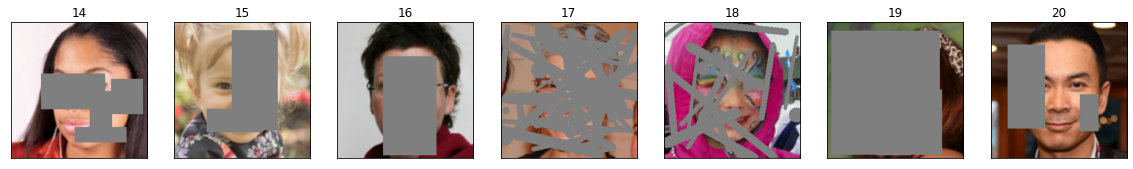

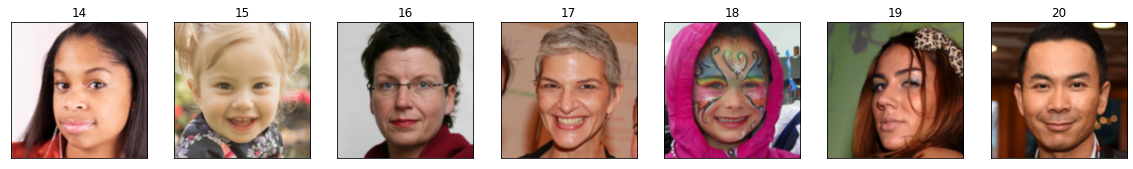

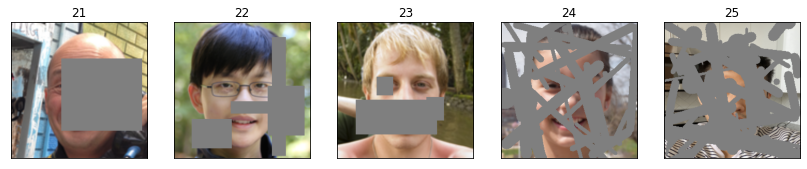

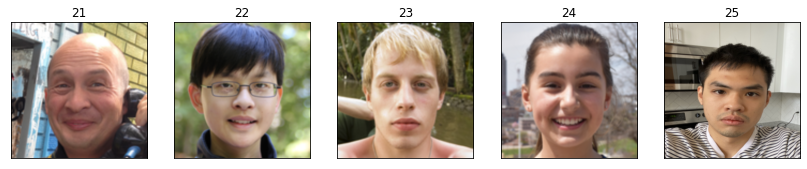

In [298]:
# Visualization of some images in the list
for i in range(0, 4):
    list_id = [k+i*7 for k in range(7)]
    plot_multiple_given_img_id(list_id, list_img_mask, 7)
    plot_multiple_given_img_id(list_id, list_img_groundtruth, 7)

In [229]:
# Visualization of some images in the list
'''def plot_multiple(start, end, list_img):
    plt.figure(figsize=(20,20))
    for i in range(start, end):
        if (i < len(list_img)):
            plt.subplot(1,end-start,i%(end-start)+1)
            plt.title(str(i+1))
            plt.imshow(list_img[i])
            plt.xticks([]), plt.yticks([])
    plt.show()
    '''
#plot_multiple(0, 5, list_img_mask)
#plot_multiple(0, 5, list_img_groundtruth)

'def plot_multiple(start, end, list_img):\n    plt.figure(figsize=(20,20))\n    for i in range(start, end):\n        if (i < len(list_img)):\n            plt.subplot(1,end-start,i%(end-start)+1)\n            plt.title(str(i+1))\n            plt.imshow(list_img[i])\n            plt.xticks([]), plt.yticks([])\n    plt.show()\n    '

In [228]:
# Visualization of some images in the list
#for i in range(0, 10):   
    #plot_multiple(0+i*5, 5+i*5, list_list_img_out[4])

# Caluclate SSIM Score

Note: Changed in version 0.16: This function was renamed from skimage.measure.compare_ssim to skimage.metrics.structural_similarity

Reference: https://stackoverflow.com/questions/55178229/importerror-cannot-import-name-structural-similarity-error 

## SSIM score table

In [344]:
list_list_ssim = []
i=0
for img_gtruth, list_img_out in zip(list_img_groundtruth, list_list_img_out):
    list_ssim = []
    for img_out in list_img_out:
        ssim_score = structural_similarity(img_gtruth, img_out, multichannel=True)
        list_ssim.append(ssim_score)
    list_list_ssim.append(list_ssim)

In [345]:
image_number = [i for i in range(1,27)]
df_ssim = pd.DataFrame(data = list_list_ssim)
#df_ssim.insert(loc=0, column='image', value=image_number)

df_ssim

0         1         2   ...        47        48        49
0   0.710103  0.706094  0.720759  ...  0.710337  0.712385  0.704643
1   0.846430  0.846549  0.846043  ...  0.846481  0.845889  0.845923
2   0.883848  0.886958  0.885586  ...  0.882824  0.876944  0.885843
..       ...       ...       ...  ...       ...       ...       ...
23  0.917711  0.915873  0.920037  ...  0.920520  0.917907  0.918097
24  0.684645  0.698925  0.696474  ...  0.695701  0.703505  0.692462
25  0.694302  0.679272  0.680114  ...  0.678657  0.678499  0.662027

[26 rows x 50 columns]

In [346]:
mean_ssim_by_images = df_ssim.mean(axis = 1) #axis=1 for calculating mean of each row
df_ssim_ = df_ssim.copy()
image_number = [i for i in range(0,26)]
df_ssim_.insert(loc=0, column='image_id', value=image_number)
df_ssim_.insert(loc=1, column='mean', value=mean_ssim_by_images)

# Visualize data sorted from the best to worst mean of SSIM scores
df_ssim_sorted_1 = df_ssim_.sort_values(by='mean', ascending=False)
df_ssim_sorted_1

image_id      mean         0  ...        47        48        49
23        23  0.918419  0.917711  ...  0.920520  0.917907  0.918097
3          3  0.910127  0.906360  ...  0.909299  0.903683  0.908254
11        11  0.894535  0.899388  ...  0.896297  0.888303  0.882920
..       ...       ...       ...  ...       ...       ...       ...
25        25  0.676537  0.694302  ...  0.678657  0.678499  0.662027
9          9  0.615126  0.618748  ...  0.618387  0.618162  0.608343
19        19  0.520405  0.522354  ...  0.540669  0.501832  0.522253

[26 rows x 52 columns]

In [378]:
pd.set_option("max_columns", 8) #Showing only 6 columns
pd.set_option("max_rows", 8) #Showing only 6 rows
df_ssim_sorted_1

image_id      mean         0         1  ...        46        47        48  \
23        23  0.918419  0.917711  0.915873  ...  0.917085  0.920520  0.917907   
3          3  0.910127  0.906360  0.908306  ...  0.910367  0.909299  0.903683   
11        11  0.894535  0.899388  0.892184  ...  0.893571  0.896297  0.888303   
20        20  0.894138  0.891464  0.897670  ...  0.888794  0.890198  0.894168   
..       ...       ...       ...       ...  ...       ...       ...       ...   
17        17  0.691193  0.693020  0.689691  ...  0.695928  0.695544  0.694331   
25        25  0.676537  0.694302  0.679272  ...  0.683070  0.678657  0.678499   
9          9  0.615126  0.618748  0.618975  ...  0.619402  0.618387  0.618162   
19        19  0.520405  0.522354  0.530161  ...  0.512296  0.540669  0.501832   

          49  
23  0.918097  
3   0.908254  
11  0.882920  
20  0.892992  
..       ...  
17  0.692799  
25  0.662027  
9   0.608343  
19  0.522253  

[26 rows x 52 columns]

In [363]:
# Visualize data sorted from the best to worst SSIM scores
#cols = list(df_ssim_.columns[2:])
#df_ssim_sorted_2 = df_ssim_.sort_values(by=cols, ascending=False)

#pd.set_option("max_columns", 10) #Showing only 6 columns
#pd.set_option("max_rows", 10) #Showing only 6 rows
#df_ssim_sorted_2

In [367]:
pd.reset_option('^display.', silent=True)

In [351]:
df_ssim_tranpose = df_ssim.T
df_ssim_tranpose

0         1         2   ...        23        24        25
0   0.710103  0.846430  0.883848  ...  0.917711  0.684645  0.694302
1   0.706094  0.846549  0.886958  ...  0.915873  0.698925  0.679272
2   0.720759  0.846043  0.885586  ...  0.920037  0.696474  0.680114
..       ...       ...       ...  ...       ...       ...       ...
47  0.710337  0.846481  0.882824  ...  0.920520  0.695701  0.678657
48  0.712385  0.845889  0.876944  ...  0.917907  0.703505  0.678499
49  0.704643  0.845923  0.885843  ...  0.918097  0.692462  0.662027

[50 rows x 26 columns]

## Visualize Images of Best & Worst SSIM Scores

In [372]:
list_img_id = (df_ssim_sorted_1['image_id'].copy().values)
print(list_img_id)

[23  3 11 20 14  2 15 16 22 21  1  8 10  7 18  4  6 13  0 12  5 24 17 25
  9 19]


In [359]:
# Visualization of some images in the list
#for i in range(0, 4):
    #list_id = [list_img_id[k] for k in range(0+i*7, 7+i*7) if k < len(list_img_id)]
    #plot_multiple_given_img_id(list_id, list_img_mask, 7)
    #plot_multiple_given_img_id(list_id, list_img_groundtruth, 7)

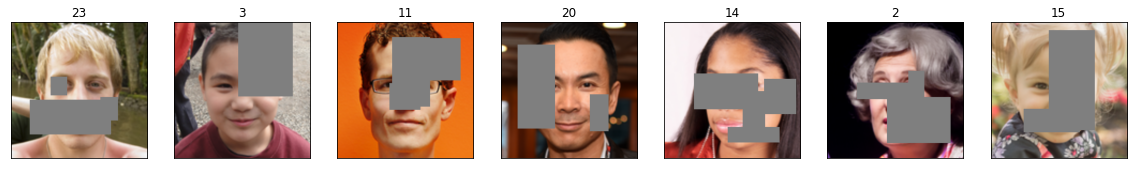

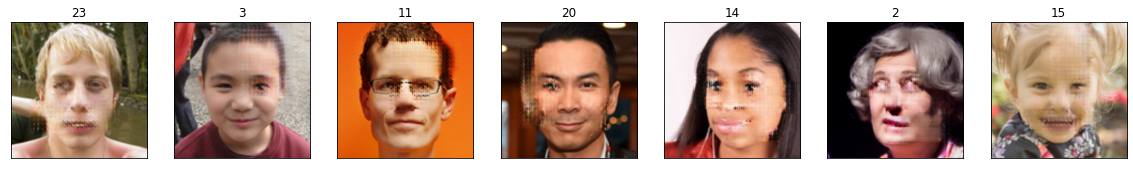

In [365]:
# Visualization of some images in the list
list_id = [list_img_id[k] for k in range(0, 7) if k < len(list_img_id)]
plot_multiple_given_img_id(list_id, list_img_mask, 7)
plt.figure(figsize=(20,20))
i=1
for img_id in list_id:
    plt.subplot(1, 7, i), plt.title(str(img_id))
    plt.imshow(list_list_img_out[img_id][0])
    plt.xticks([]), plt.yticks([])
    i = i + 1

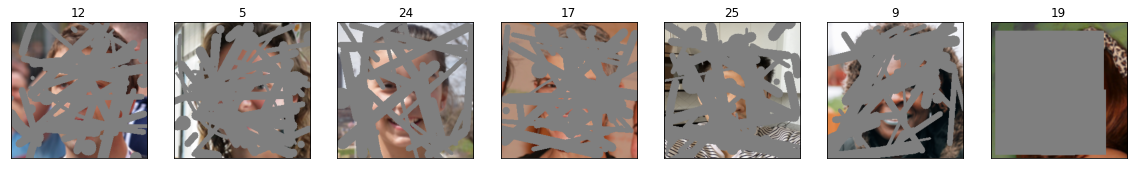

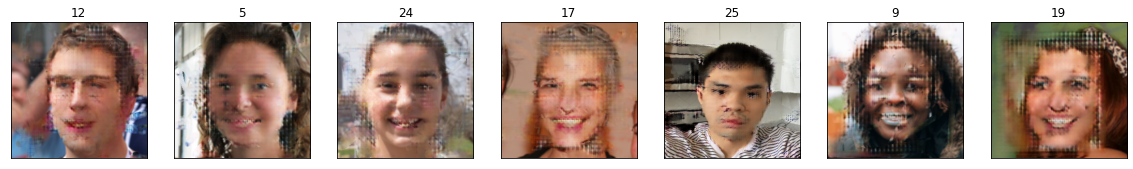

In [366]:
list_id = [list_img_id[k] for k in range(19, 26) if k < len(list_img_id)]
plot_multiple_given_img_id(list_id, list_img_mask, 7)
plt.figure(figsize=(20,20))
i=1
for img_id in list_id:
    plt.subplot(1, 7, i), plt.title(str(img_id))
    plt.imshow(list_list_img_out[img_id][0])
    plt.xticks([]), plt.yticks([])
    i = i + 1

Images of best ISSM scores


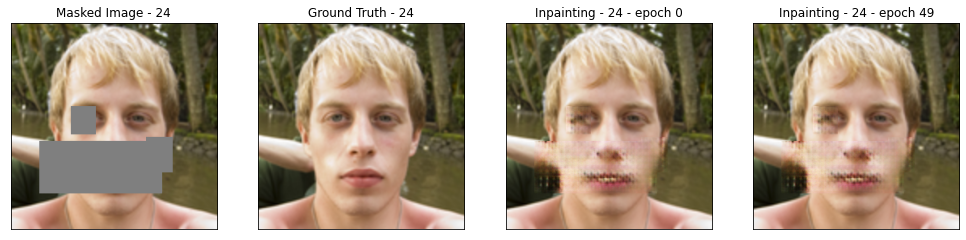

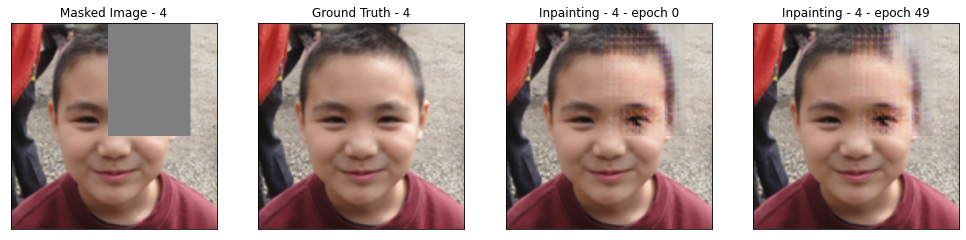

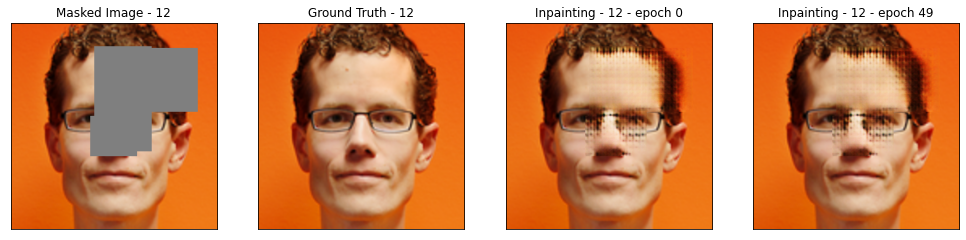

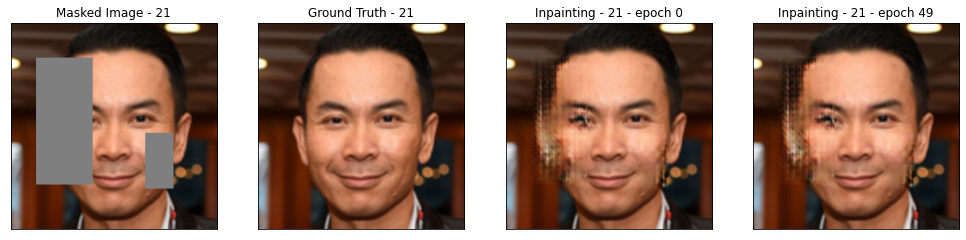

In [286]:
best_ssim_id = list_img_id[0:4]
print("Images of best ISSM scores")
for i in best_ssim_id:
    plt.figure(figsize=(17,10))
    plt.subplot(1, 4, 1), plt.title("Masked Image - " + str(i+1)), 
    plt.imshow(list_img_mask[i]), plt.xticks([]), plt.yticks([])
    
    plt.subplot(1, 4, 2), plt.title("Ground Truth - " + str(i+1)), 
    plt.imshow(list_img_groundtruth[i]), plt.xticks([]), plt.yticks([])
    
    plt.subplot(1, 4, 3), plt.title("Inpainting - " + str(i+1) + " - epoch 0"), 
    plt.imshow(list_list_img_out[i][0]), plt.xticks([]), plt.yticks([])
    
    plt.subplot(1, 4, 4), plt.title("Inpainting - " + str(i+1) + " - epoch 49"), 
    plt.imshow(list_list_img_out[i][49]), plt.xticks([]), plt.yticks([])
    plt.show()

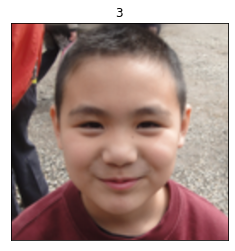

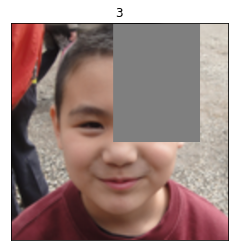

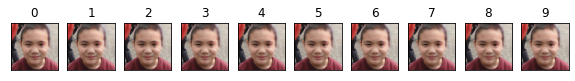

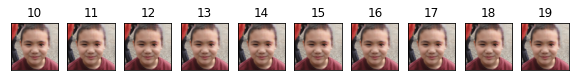

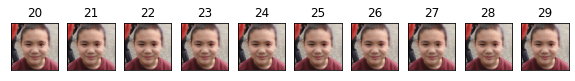

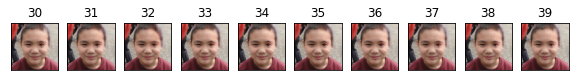

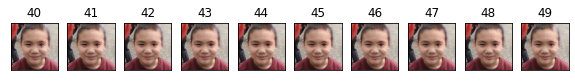

In [446]:
plt.title(str(3))
plt.imshow(list_img_groundtruth[3])
plt.xticks([]), plt.yticks([]), plt.show()

plt.title(str(3))
plt.imshow(list_img_mask[3])
plt.xticks([]), plt.yticks([]), plt.show()

for row in range(0, 5):
    i=1
    plt.figure(figsize=(10,10))
    for img_id in range(0, 10):
        plt.subplot(1, 10, i), plt.title(str(img_id + row *10))
        plt.imshow(list_list_img_out[3][img_id + row *10])
        plt.xticks([]), plt.yticks([])
        i = i + 1

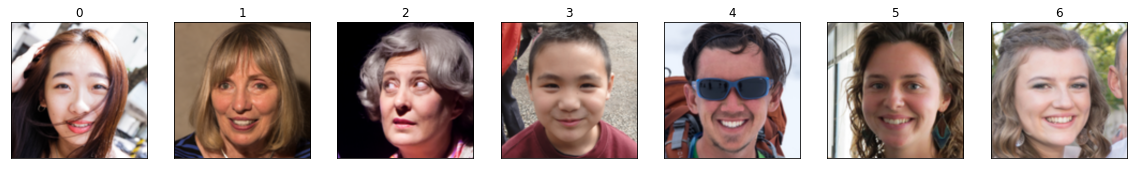

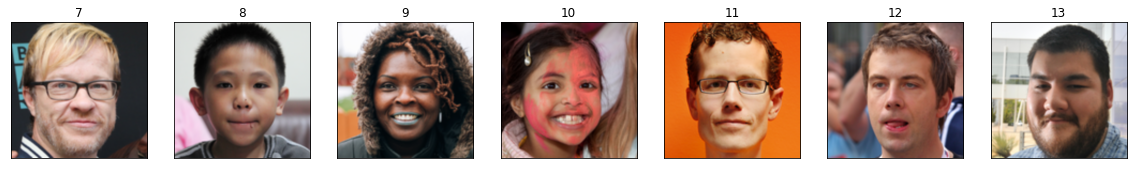

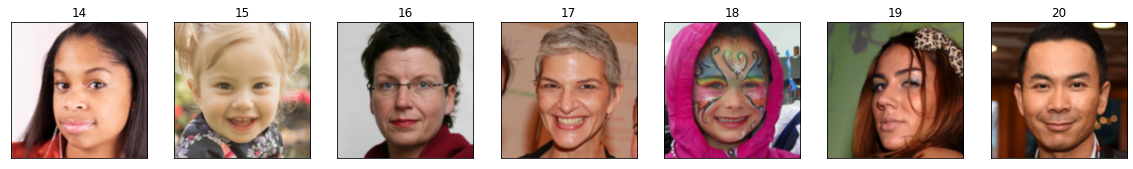

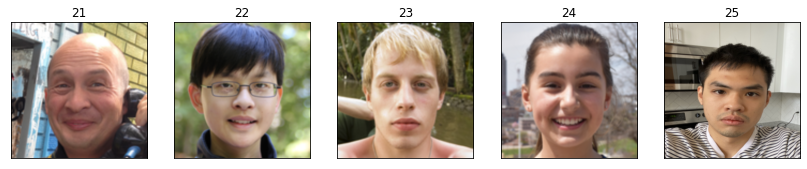

In [429]:
# Visualization of some images in the list
for i in range(0, 4):
    list_id = [k+i*7 for k in range(7)]
    plot_multiple_given_img_id(list_id, list_img_groundtruth, 7)

[17 25  9 19]
Images of worst ISSM scores


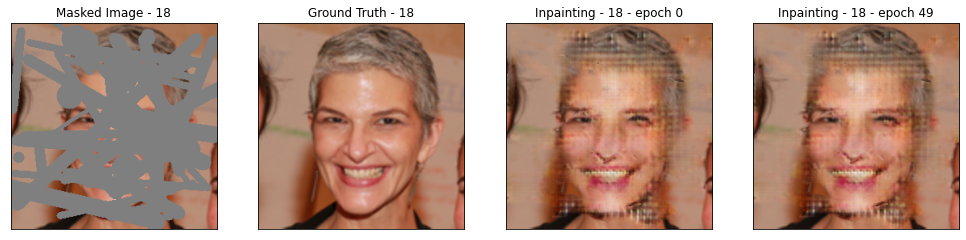

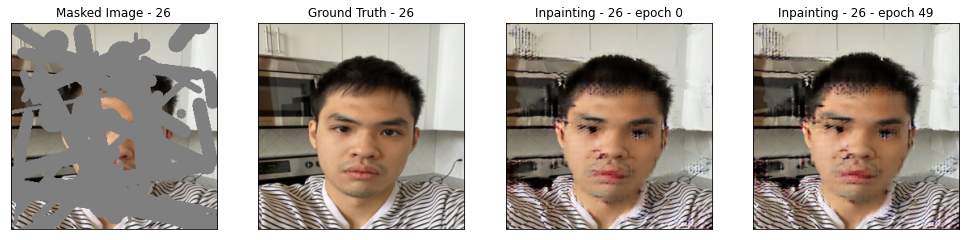

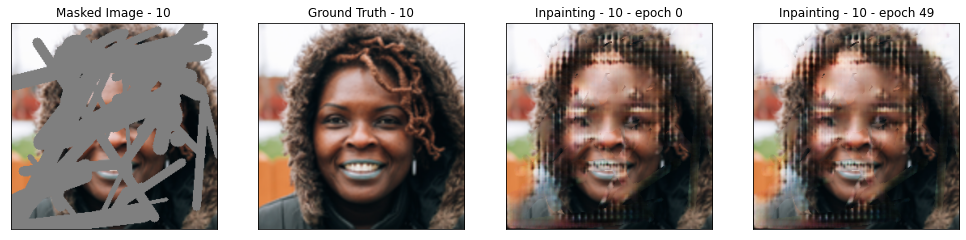

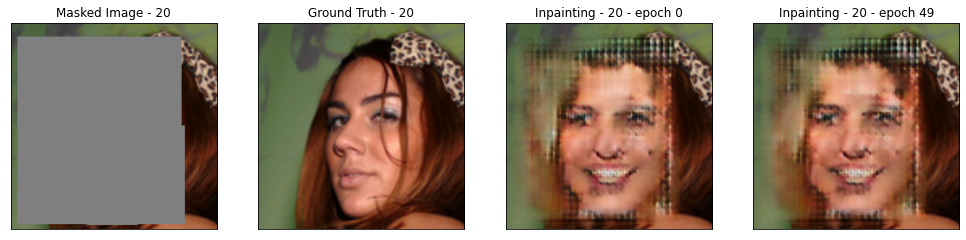

In [437]:
worst_ssim_id = list_img_id[22:]
print(worst_ssim_id)
print("Images of worst ISSM scores")
for i in worst_ssim_id:
    plt.figure(figsize=(17, 10))
    plt.subplot(1, 4, 1), plt.title("Masked Image - " + str(i+1)) 
    plt.imshow(list_img_mask[i]), plt.xticks([]), plt.yticks([])
    
    plt.subplot(1, 4, 2), plt.title("Ground Truth - " + str(i+1)) 
    plt.imshow(list_img_groundtruth[i]), plt.xticks([]), plt.yticks([])
    
    plt.subplot(1, 4, 3), plt.title("Inpainting - " + str(i+1) + " - epoch 0") 
    plt.imshow(list_list_img_out[i][0]), plt.xticks([]), plt.yticks([])
    
    plt.subplot(1, 4, 4), plt.title("Inpainting - " + str(i+1) + " - epoch 49") 
    plt.imshow(list_list_img_out[i][49]), plt.xticks([]), plt.yticks([])
    plt.show()

# Calculate PSNR Score

In [325]:
# https://www.geeksforgeeks.org/python-peak-signal-to-noise-ratio-psnr/

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

In [326]:
list_list_psnr = []
i=0
for img_gtruth, list_img_out in zip(list_img_groundtruth, list_list_img_out):
    list_psnr = []
    for img_out in list_img_out:
        psnr_score = PSNR(img_gtruth, img_out)
        list_psnr.append(psnr_score)
    list_list_psnr.append(list_psnr)

In [328]:
image_number = [i for i in range(1,27)]
df_psnr = pd.DataFrame(data = list_list_psnr)
#df_psnr.insert(loc=0, column='image', value=image_number)

df_psnr

0          1          2          3          4          5   \
0   31.289386  31.311426  31.415988  31.308309  31.352798  31.291478   
1   34.595209  34.613741  34.617994  34.673202  34.571218  34.603256   
2   35.136742  35.059496  35.089878  35.032636  35.017818  35.081166   
3   35.900848  35.951420  36.130813  35.847207  36.003124  35.918848   
4   33.424549  33.469003  33.504023  33.440618  33.507953  33.499009   
5   31.176131  31.123171  31.156397  31.008322  31.190571  31.307514   
6   32.595830  32.628019  32.597692  32.490399  32.578991  32.591391   
7   33.157254  33.238031  33.240878  33.212678  33.233234  33.129907   
8   33.459597  33.392994  33.402950  33.437300  33.478726  33.377121   
9   30.916139  30.926596  30.938553  30.928326  30.947437  30.890666   
10  33.628770  33.756173  33.589932  33.644842  33.502065  33.646721   
11  36.271907  36.118319  36.110271  36.064920  36.090793  35.981336   
12  31.234762  31.445818  31.323509  31.253211  31.321307  31.210193   
13  31.440167  31.547644  31.580418  31.492312  31.532871  31.414255   
14  35.414542  35.574704  35.209589  35.580519  35.258291  35.316931   
15  34.805094  34.709861  34.789908  34.838493  34.546322  34.707820   
16  34.860306  34.893598  35.089686  34.741480  34.926633  34.871480   
17  31.483085  31.479810  31.413138  31.513052  31.342571  31.521414   
18  33.493264  33.472430  33.505067  33.501713  33.486434  33.487996   
19  29.748785  29.750040  29.693196  29.751925  29.724477  29.756372   
20  35.865022  35.928127  35.800577  35.813663  35.893021  35.779646   
21  34.125379  34.295183  33.841757  33.999266  34.152250  34.260909   
22  35.207719  35.251730  35.120240  35.220070  35.172445  35.142717   
23  36.694018  36.503304  36.590121  36.618111  36.737674  36.687611   
24  31.386198  31.421899  31.448961  31.433089  31.375852  31.446738   
25  31.729423  31.583366  31.565325  31.610984  31.561456  31.507170   

           6          7          8          9   ...         40         41  \
0   31.249627  31.272898  31.348076  31.328278  ...  31.317997  31.293378   
1   34.629993  34.617984  34.610720  34.599828  ...  34.611503  34.624218   
2   35.127796  35.122020  35.010137  35.019587  ...  35.031860  35.106496   
3   36.150528  35.986817  36.097310  35.983016  ...  35.981793  35.909069   
4   33.454662  33.406233  33.478483  33.424129  ...  33.397912  33.492349   
5   31.230964  31.207697  31.050795  31.131608  ...  31.244176  31.092873   
6   32.597127  32.545782  32.572047  32.583378  ...  32.603082  32.577560   
7   33.212215  33.176723  33.216816  33.138335  ...  33.132219  33.206315   
8   33.371887  33.343692  33.439030  33.393544  ...  33.375434  33.339393   
9   30.845658  30.891391  30.936165  30.893382  ...  30.881262  30.932681   
10  33.552733  33.712951  33.505987  33.532887  ...  33.669203  33.682604   
11  36.120195  36.096538  36.182190  36.284072  ...  36.169016  36.319750   
12  31.294649  31.251072  31.262583  31.263845  ...  31.135795  31.303339   
13  31.518703  31.409219  31.472932  31.486049  ...  31.510534  31.552125   
14  35.279569  35.263351  35.489481  35.182409  ...  35.277899  35.412414   
15  34.626422  34.818375  34.842954  34.377097  ...  34.660411  34.892692   
16  34.986617  34.938222  34.907281  35.115077  ...  34.926732  34.986618   
17  31.452788  31.482454  31.415251  31.538501  ...  31.354146  31.460491   
18  33.486248  33.482848  33.480414  33.487103  ...  33.473795  33.474103   
19  29.706796  29.751028  29.777165  29.765972  ...  29.815148  29.671194   
20  35.764871  35.963545  35.744655  35.935724  ...  35.948558  35.864285   
21  34.077874  34.076400  34.241688  34.251153  ...  34.175012  34.007541   
22  35.171041  35.160638  35.183992  35.169596  ...  35.086754  35.221892   
23  36.559661  36.540082  36.519057  36.694909  ...  36.613748  36.731749   
24  31.373573  31.450745  31.469278  31.467501  ...  31.413593  31.389274   
25  31.566633  31.522546  31.548172  31.651473  ...  31.556229  

In [329]:
mean_psnr_by_images = df_psnr.mean(axis = 1) #axis=1 for calculating mean of each row
df_psnr_ = df_psnr.copy()
image_number = [i for i in range(0,26)]
df_psnr_.insert(loc=0, column='image_id', value=image_number)
df_psnr_.insert(loc=1, column='mean', value=mean_psnr_by_images)

# Visualize data sorted from the best to worst mean of PSNR scores
df_psnr_sorted_1 = df_psnr_.sort_values(by='mean', ascending=False)
df_psnr_sorted_1

image_id       mean          0          1          2          3  \
23        23  36.643850  36.694018  36.503304  36.590121  36.618111   
11        11  36.148645  36.271907  36.118319  36.110271  36.064920   
3          3  35.976883  35.900848  35.951420  36.130813  35.847207   
20        20  35.894791  35.865022  35.928127  35.800577  35.813663   
14        14  35.352410  35.414542  35.574704  35.209589  35.580519   
22        22  35.175976  35.207719  35.251730  35.120240  35.220070   
2          2  35.071741  35.136742  35.059496  35.089878  35.032636   
16        16  34.942922  34.860306  34.893598  35.089686  34.741480   
15        15  34.640418  34.805094  34.709861  34.789908  34.838493   
1          1  34.602296  34.595209  34.613741  34.617994  34.673202   
21        21  34.186984  34.125379  34.295183  33.841757  33.999266   
10        10  33.619381  33.628770  33.756173  33.589932  33.644842   
18        18  33.480273  33.493264  33.472430  33.505067  33.501713   
4          4  33.468173  33.424549  33.469003  33.504023  33.440618   
8          8  33.379468  33.459597  33.392994  33.402950  33.437300   
7          7  33.177027  33.157254  33.238031  33.240878  33.212678   
6          6  32.576501  32.595830  32.628019  32.597692  32.490399   
25        25  31.547474  31.729423  31.583366  31.565325  31.610984   
13        13  31.518552  31.440167  31.547644  31.580418  31.492312   
17        17  31.462293  31.483085  31.479810  31.413138  31.513052   
24        24  31.427512  31.386198  31.421899  31.448961  31.433089   
0          0  31.332240  31.289386  31.311426  31.415988  31.308309   
12        12  31.264525  31.234762  31.445818  31.323509  31.253211   
5          5  31.129193  31.176131  31.123171  31.156397  31.008322   
9          9  30.901778  30.916139  30.926596  30.938553  30.928326   
19        19  29.737357  29.748785  29.750040  29.693196  29.751925   

            4          5          6          7  ...         40         41  \
23  36.737674  36.687611  36.559661  36.540082  ...  36.613748  36.731749   
11  36.090793  35.981336  36.120195  36.096538  ...  36.169016  36.319750   
3   36.003124  35.918848  36.150528  35.986817  ...  35.981793  35.909069   
20  35.893021  35.779646  35.764871  35.963545  ...  35.948558  35.864285   
14  35.258291  35.316931  35.279569  35.263351  ...  35.277899  35.412414   
22  35.172445  35.142717  35.171041  35.160638  ...  35.086754  35.221892   
2   35.017818  35.081166  35.127796  35.122020  ...  35.031860  35.106496   
16  34.926633  34.871480  34.986617  34.938222  ...  34.926732  34.986618   
15  34.546322  34.707820  34.626422  34.818375  ...  34.660411  34.892692   
1   34.571218  34.603256  34.629993  34.617984  ...  34.611503  34.624218   
21  34.152250  34.260909  34.077874  34.076400  ...  34.175012  34.007541   
10  33.502065  33.646721  33.552733  33.712951  ...  33.669203  33.682604   
18  33.486434  33.487996  33.486248  33.482848  ...  33.473795  33.474103   
4   33.507953  33.499009  33.454662  33.406233  ...  33.397912  33.492349   
8   33.478726  33.377121  33.371887  33.343692  ...  33.375434  33.339393   
7   33.233234  33.129907  33.212215  33.176723  ...  33.132219  33.206315   
6   32.578991  32.591391  32.597127  32.545782  ...  32.603082  32.577560   
25  31.561456  31.507170  31.566633  31.522546  ...  31.556229  31.596495   
13  31.532871  31.414255  31.518703  31.409219  ...  31.510534  31.552125   
17  31.342571  31.521414  31.452788  31.482454  ...  31.354146  31.460491   
24  31.375852  31.446738  31.373573  31.450745  ...  31.413593  31.389274   
0   31.352798  31.291478  31.249627  31.272898  ...  31.317997  31.293378   
12  31.321307  31.210193  31.294649  31.251072  ...  31.135795  31.303339   
5   31.190571  31.307514  31.230964  31.207697  ...  31.244176  31.092873   
9   30.947437  30.890666  30.845658  30.891391  ...  30.881262  30.932681   
19  29.724477  29.756372  29.706796  29.751028  ...  29.815148  29.671194   

      

In [377]:
pd.set_option("max_columns", 8) #Showing only 6 columns
pd.set_option("max_rows", 8) #Showing only 6 rows
df_psnr_sorted_1

image_id       mean          0          1  ...         46         47  \
23        23  36.643850  36.694018  36.503304  ...  36.533961  36.822991   
11        11  36.148645  36.271907  36.118319  ...  36.125391  36.228952   
3          3  35.976883  35.900848  35.951420  ...  36.033813  35.990388   
20        20  35.894791  35.865022  35.928127  ...  35.789940  35.893077   
..       ...        ...        ...        ...  ...        ...        ...   
12        12  31.264525  31.234762  31.445818  ...  31.106084  31.195558   
5          5  31.129193  31.176131  31.123171  ...  31.212215  31.165599   
9          9  30.901778  30.916139  30.926596  ...  30.925427  30.904244   
19        19  29.737357  29.748785  29.750040  ...  29.769799  29.810887   

           48         49  
23  36.718100  36.613575  
11  36.049256  35.743276  
3   35.798776  35.860911  
20  35.937917  35.863821  
..        ...        ...  
12  31.258641  31.213109  
5   31.020753  31.111523  
9   30.934820  30.847321  
19  29.724323  29.748198  

[26 rows x 52 columns]

## Visualizate images for worst and best PSNR score

In [371]:
list_img_id_psnr = (df_psnr_sorted_1['image_id'].copy().values)
print(list_img_id)

[23 11  3 20 14 22  2 16 15  1 21 10 18  4  8  7  6 25 13 17 24  0 12  5
  9 19]


In [370]:
pd.reset_option('^display.', silent=True)

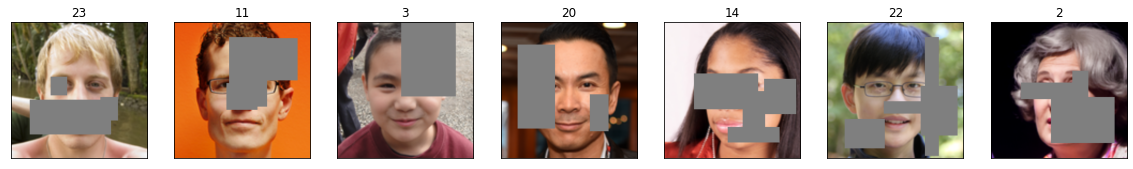

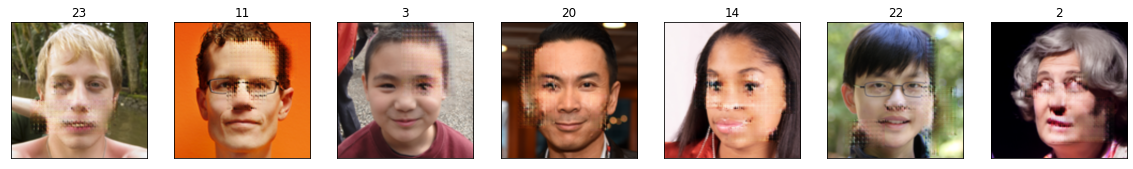

In [375]:
list_id = [list_img_id_psnr[k] for k in range(0, 7) if k < len(list_img_id_psnr)]
plot_multiple_given_img_id(list_id, list_img_mask, 7)
plt.figure(figsize=(20, 20))
i=1
for img_id in list_id:
    plt.subplot(1, 7, i), plt.title(str(img_id))
    plt.imshow(list_list_img_out[img_id][0])
    plt.xticks([]), plt.yticks([])
    i = i + 1

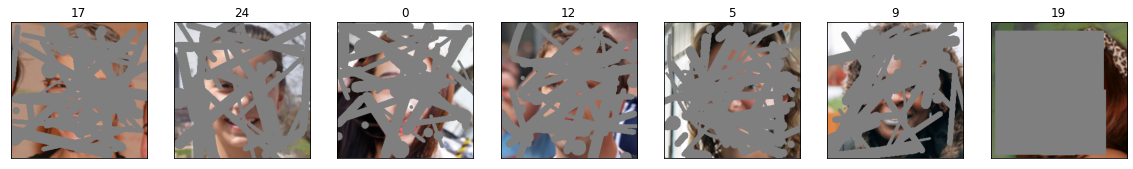

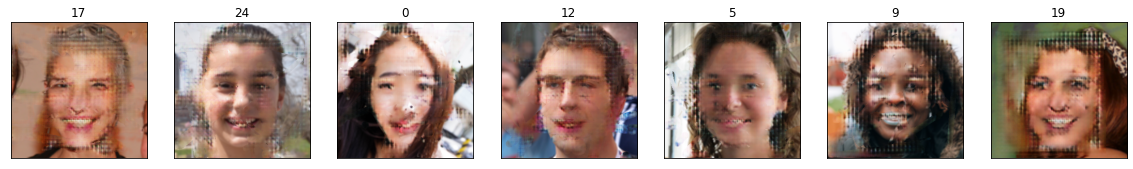

In [374]:
list_id = [list_img_id_psnr[k] for k in range(19, 26) if k < len(list_img_id_psnr)]
plot_multiple_given_img_id(list_id, list_img_mask, 7)
plt.figure(figsize=(20, 20))
i=1
for img_id in list_id:
    plt.subplot(1, 7, i), plt.title(str(img_id))
    plt.imshow(list_list_img_out[img_id][0])
    plt.xticks([]), plt.yticks([])
    i = i + 1

# Result comparison

In [414]:
pd.reset_option('^display.', silent=True)

In [426]:
df1 = df_ssim_[['image_id','mean']].copy()
df1.columns = ['image_id','ssim_mean']
df2 = df_psnr_[['mean']].copy()
df2.columns = ['psnr_mean']
df_comp = pd.concat([df1, df2], axis=1)

df_comp

image_id  ssim_mean  psnr_mean
0          0   0.709707  31.332240
1          1   0.846261  34.602296
2          2   0.884633  35.071741
3          3   0.910127  35.976883
4          4   0.777493  33.468173
..       ...        ...        ...
21        21   0.854151  34.186984
22        22   0.871799  35.175976
23        23   0.918419  36.643850
24        24   0.692855  31.427512
25        25   0.676537  31.547474

[26 rows x 3 columns]

In [427]:
df_comp_rank = df_comp.copy()
df_comp_rank['ssim_rank'] = df_comp_rank['ssim_mean'].rank(ascending = False)
df_comp_rank['psnr_rank'] = df_comp_rank['psnr_mean'].rank(ascending = False)
pd.set_option("max_columns", 10) #Showing only 6 columns
pd.set_option("max_rows", 10) #Showing only 6 rows
df_comp_rank_sorted = df_comp_rank.sort_values(by='ssim_mean', ascending=False)
df_comp_rank_sorted

image_id  ssim_mean  psnr_mean  ssim_rank  psnr_rank
23        23   0.918419  36.643850        1.0        1.0
3          3   0.910127  35.976883        2.0        3.0
11        11   0.894535  36.148645        3.0        2.0
20        20   0.894138  35.894791        4.0        4.0
14        14   0.888750  35.352410        5.0        5.0
..       ...        ...        ...        ...        ...
24        24   0.692855  31.427512       22.0       21.0
17        17   0.691193  31.462293       23.0       20.0
25        25   0.676537  31.547474       24.0       18.0
9          9   0.615126  30.901778       25.0       25.0
19        19   0.520405  29.737357       26.0       26.0

[26 rows x 5 columns]

In [428]:
df_comp_rank_sorted.T

23         3          11         20        14  ...  \
image_id   23.000000   3.000000  11.000000  20.000000  14.00000  ...   
ssim_mean   0.918419   0.910127   0.894535   0.894138   0.88875  ...   
psnr_mean  36.643850  35.976883  36.148645  35.894791  35.35241  ...   
ssim_rank   1.000000   2.000000   3.000000   4.000000   5.00000  ...   
psnr_rank   1.000000   3.000000   2.000000   4.000000   5.00000  ...   

                  24         17         25         9          19  
image_id   24.000000  17.000000  25.000000   9.000000  19.000000  
ssim_mean   0.692855   0.691193   0.676537   0.615126   0.520405  
psnr_mean  31.427512  31.462293  31.547474  30.901778  29.737357  
ssim_rank  22.000000  23.000000  24.000000  25.000000  26.000000  
psnr_rank  21.000000  20.000000  18.000000  25.000000  26.000000  

[5 rows x 26 columns]